# Image Classification of MNIST Digits using a Multilayer Perceptron

Example followed from https://www.tensorflow.org/tutorials/quickstart/beginner.

In [67]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [68]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the data between 0-1
x_train = x_train / 255.0
x_test = x_test / 255.0

In [69]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


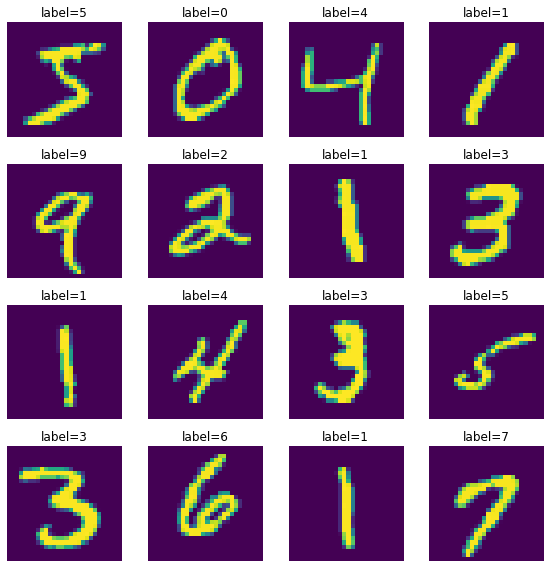

In [84]:
plt.figure(figsize=(8,8))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(x_train[i])
    plt.axis("off")
    plt.title("label={}".format(y_train[i]))
# plt.suptitle("Example Training Images")
plt.tight_layout()
plt.show()

In [71]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(128, activation="relu"))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(10))

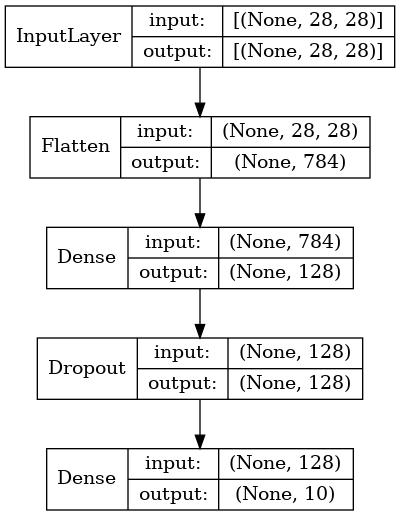

In [72]:
tf.keras.utils.plot_model(model, to_file="/tmp/model.png", show_shapes=True, show_layer_names=False)

In [73]:
# Examine the raw "logit" score of the untrained model for each class
predictions = model(x_train[0:1]).numpy()
predictions

array([[ 0.14374386,  0.55375266,  0.11956158, -0.03942872,  0.04821941,
         0.41931096,  0.22431593,  0.20298816, -0.14083418, -0.45754212]],
      dtype=float32)

In [74]:
# Convert the "logit" scores into probabilities
tf.nn.softmax(predictions).numpy()

array([[0.10012901, 0.15087749, 0.0977367 , 0.08336986, 0.09100687,
        0.13189767, 0.10853053, 0.10624032, 0.07533021, 0.05488134]],
      dtype=float32)

In [75]:
loss_func = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

loss_func(y_train[0:1], predictions).numpy()

2.0257287

In [76]:
model.compile(optimizer="adam", loss=loss_func, metrics=["accuracy"])
history = model.fit(x_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
1125/1125 [==============================] - 4s 4ms/step - loss: 0.3575 - accuracy: 0.8966 - val_loss: 0.1917 - val_accuracy: 0.9439
Epoch 2/10
1125/1125 [==============================] - 4s 3ms/step - loss: 0.1662 - accuracy: 0.9503 - val_loss: 0.1406 - val_accuracy: 0.9585
Epoch 3/10
1125/1125 [==============================] - 4s 3ms/step - loss: 0.1249 - accuracy: 0.9626 - val_loss: 0.1295 - val_accuracy: 0.9614
Epoch 4/10
1125/1125 [==============================] - 3s 3ms/step - loss: 0.1011 - accuracy: 0.9693 - val_loss: 0.1138 - val_accuracy: 0.9657
Epoch 5/10
1125/1125 [==============================] - 3s 3ms/step - loss: 0.0834 - accuracy: 0.9740 - val_loss: 0.1056 - val_accuracy: 0.9691
Epoch 6/10
1125/1125 [==============================] - 3s 3ms/step - loss: 0.0729 - accuracy: 0.9762 - val_loss: 0.1035 - val_accuracy: 0.9708
Epoch 7/10
1125/1125 [==============================] - 3s 3ms/step - loss: 0.0604 - accuracy: 0.9807 - val_loss: 0.0982 - val_accuracy:

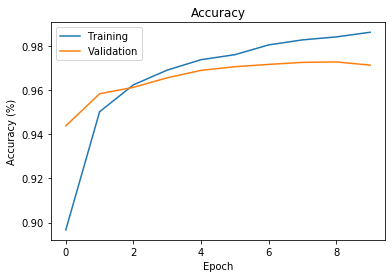

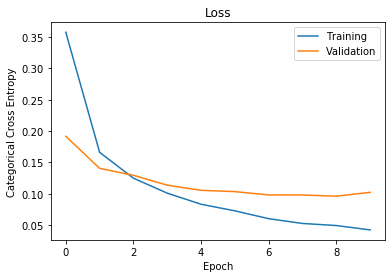

In [86]:
plt.figure()
plt.plot(history.history["accuracy"], label="Training")
plt.plot(history.history["val_accuracy"], label="Validation")
plt.title("Accuracy")
plt.ylabel("Accuracy (%)")
plt.xlabel("Epoch")
plt.legend()

plt.figure()
plt.plot(history.history["loss"], label="Training")
plt.plot(history.history["val_loss"], label="Validation")
plt.title("Loss")
plt.ylabel("Categorical Cross Entropy")
plt.xlabel("Epoch")
plt.legend()

plt.show()

In [78]:
model.evaluate(x_train, y_train, verbose=2)

1875/1875 - 2s - loss: 0.0519 - accuracy: 0.9857


[0.051897771656513214, 0.9856833219528198]

In [79]:
model(x_test[0:1])

<tf.Tensor: shape=(1, 10), dtype=float32, numpy=
array([[ -4.7433133 , -11.643822  ,  -2.166745  ,   0.55101424,
        -14.52806   ,  -5.0411115 , -19.643633  ,  13.567191  ,
         -4.877872  ,  -1.1844928 ]], dtype=float32)>

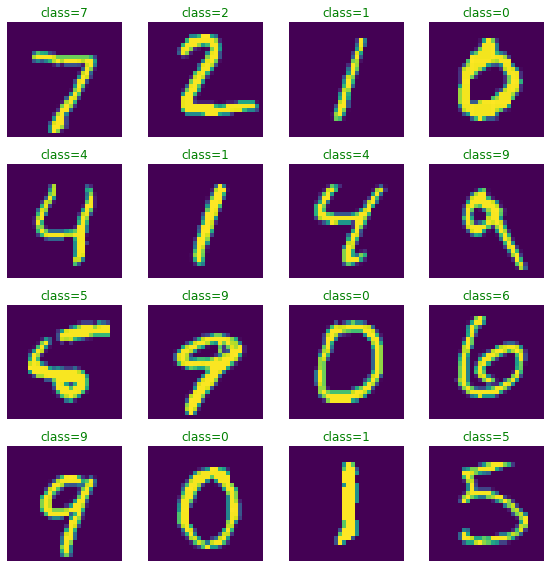

In [95]:
plt.figure(figsize=(8,8))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(x_test[i])
    plt.axis("off")
    classification = np.argmax(model(x_test[i:i+1]))
    color = "g" if classification == y_test[i] else "r"
    plt.title("class={}".format(classification), fontdict={"color": color})
# plt.suptitle("Example Test Images")
plt.tight_layout()
plt.show()